In [1]:
# Draw all defined logic elements, with color and fill

In [2]:
import schemdraw
from schemdraw import elements as elm
from schemdraw import logic
schemdraw.use('svg')

In [3]:
def drawElements(elm_list, n=5, dx=1, dy=2, ofst=.8, fname=None, **kwargs):
    x, y = 0, 0
    d = schemdraw.Drawing(fontsize=12)
    for e in elm_list:
        element = getattr(logic, e)
        A = d.add(element, xy=[(d.unit+1)*x+1,y], toplabel=e, **kwargs)
        x = x + dx
        if x >= n:
            x=0
            y=y-dy
    return d

elist = ['And', 'Nand', 'Or', 'Nor', 'Xor', 'Xnor', 'Buf', 'Not', 'NotNot', 'Tgate',
         'Schmitt', 'SchmittNot', 'SchmittAnd', 'SchmittNand']

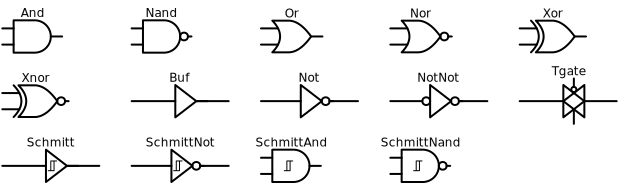

In [4]:
display(drawElements(elist, d='right'))

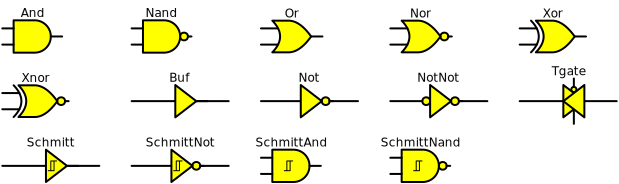

In [5]:
display(drawElements(elist, d='right', fill='yellow'))

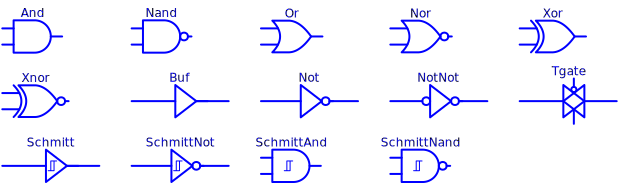

In [6]:
display(drawElements(elist, d='right', color='blue'))

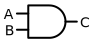

In [7]:
d = schemdraw.Drawing()
G = d.add(logic.And())
G.add_label('A', loc='in1')
G.add_label('B', loc='in2')
G.add_label('C', loc='out')
d.draw()

In [8]:
logic.And(inputs=5)

In [9]:
logic.Or(inputs=5)

In [10]:
logic.Or(inputs=5, inputnots=[1, 2, 3, 4, 5])

In [11]:
logic.Kmap(names='ABCD',
           default='0',
           groups={'100.': {'color': 'blue', 'fill': '#0000ff33'},
                   '0001': {'color': 'red', 'fill': '#ff000033'},
                   '111.': {'color': 'orange', 'fill': '#ff660033'},
                   '.1.1': {'color': 'green', 'fill': '#00660033'}},
           truthtable=[(0,0,0,0,'0000'),
                       (0,0,0,1,'0001'),
                       (0,0,1,0,'0010'),
                       (0,0,1,1,'0011'),
                       (0,1,0,0,'0100'),
                       (0,1,0,1,'0101'),
                       (0,1,1,0,'0110'),
                       (0,1,1,1,'0111'),
                       (1,0,0,0,'1000'),
                       (1,0,0,1,'1001'),
                       (1,0,1,0,'1010'),
                       (1,0,1,1,'1011'),
                       (1,1,0,0,'1100'),
                       (1,1,0,1,'1101'),
                       (1,1,1,0,'1110'),
                       (1,1,1,1,'1111')])

In [12]:
logic.Kmap(names='ABCD',
           default='',
           groups={'.0.1': {'color': 'blue', 'fill': '#0000ff33'},
                   '.1.0': {'color': 'red', 'fill': '#ff000033'},
                   '.0.0': {'color': 'green', 'fill': '#00990033'}})

In [13]:
logic.Kmap(names='ABD',
           default='0',
           groups={'100': {'color': 'blue', 'fill': '#0000ff33'},
                   '...': {'color': 'orange', 'ls':'--'},
                   '.1.': {'color': 'green', 'fill': '#88880022'}},
           truthtable=[(0,0,0, '000'),
                       (0,0,1, '001'),
                       (0,1,0, '010'),
                       (0,1,1, '011'),
                       (1,0,0, '100'),
                       (1,0,1, '101'),
                       (1,1,0, '110'),
                       (1,1,1, '111')])

In [14]:
logic.Kmap(names='AB',
           default='',
           groups={'1.': {'color': 'blue', 'fill': '#0000ff33'},
                   '..': {'color': 'purple'},
                   '.0': {'color': 'red', 'fill': '#ff000033'}},
           truthtable=[(0,0, '00'),
                       (1,1, '11'),
                       (0,1,'01'),
                       (1,0,'10')])

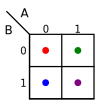

In [15]:
d = schemdraw.Drawing()
k = logic.Kmap(names='AB', default='')
d += k
d += elm.Dot().at(k.cell00).color('red')
d += elm.Dot().at(k.cell01).color('blue')
d += elm.Dot().at(k.cell11).color('purple')
d += elm.Dot().at(k.cell10).color('green')
d